# Scratch Pad

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import scipy.stats as stats

# Intialize pandas display options.
pd.set_option("display.max_columns", None)
# Intialize the matplolib styling.
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "legend.frameon": False,
    }
)

In [2]:
# Load the PBS data as a pandas dataframe.
mel_df = pd.read_csv("../data/mel_all_orthologs_pbs_n1_97_5th_percentile.txt", sep="\t")
yak_df = pd.read_csv("../data/yak_all_orthologs_pbs_n1_97_5th_percentile.txt", sep="\t")

## Correlation Between Datasets

In [ ]:
# Determine the olfactory gene overlaps.
mel_intersect = np.isin(mel_df.gene.values, yak_df.gene.values)
yak_intersect = np.isin(yak_df.gene.values, mel_df.gene.values)
# Subset the dataframes to only show the intersection.
mel_olfac_df = mel_df[mel_intersect]
yak_olfac_df = yak_df[yak_intersect]

In [3]:
# Create masks for nan values.
san_yak_mel_mask = ~np.isnan(yak_olfac_df["san:yak:mel_pbs"].values) & ~np.isnan(
    mel_olfac_df["san:yak:mel_pbs"].values
)
yak_san_mel_mask = ~np.isnan(yak_olfac_df["yak:san:mel_pbs"].values) & ~np.isnan(
    mel_olfac_df["yak:san:mel_pbs"].values
)
# Run correlation tests.
p_rho_san_yak_mel, p_pval_san_yak_mel = stats.pearsonr(
    yak_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
    mel_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
)
s_rho_san_yak_mel, s_pval_san_yak_mel = stats.spearmanr(
    yak_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
    mel_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
)
p_rho_yak_san_mel, p_pval_yak_san_mel = stats.pearsonr(
    yak_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
    mel_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
)
s_rho_yak_san_mel, s_pval_yak_san_mel = stats.spearmanr(
    yak_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
    mel_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
)
# Construct summaries.
san_yak_mel_lab = (
    r"Pearson's $\rho$ = {:.3f}, $P-value$ = {:.3e}".format(
        p_rho_san_yak_mel, p_pval_san_yak_mel
    )
    + "\n"
    + r"Spearman's $\rho$ = {:.3f}, $P-value$ = {:.3e}".format(
        s_rho_san_yak_mel, s_pval_san_yak_mel
    )
)
yak_san_mel_lab = (
    r"Pearson's $\rho$ = {:.3f}, $P-value$ = {:.3e}".format(
        p_rho_yak_san_mel, p_pval_yak_san_mel
    )
    + "\n"
    + r"Spearman's $\rho$ = {:.3f}, $P-value$ = {:.3e}".format(
        s_rho_yak_san_mel, s_pval_yak_san_mel
    )
)

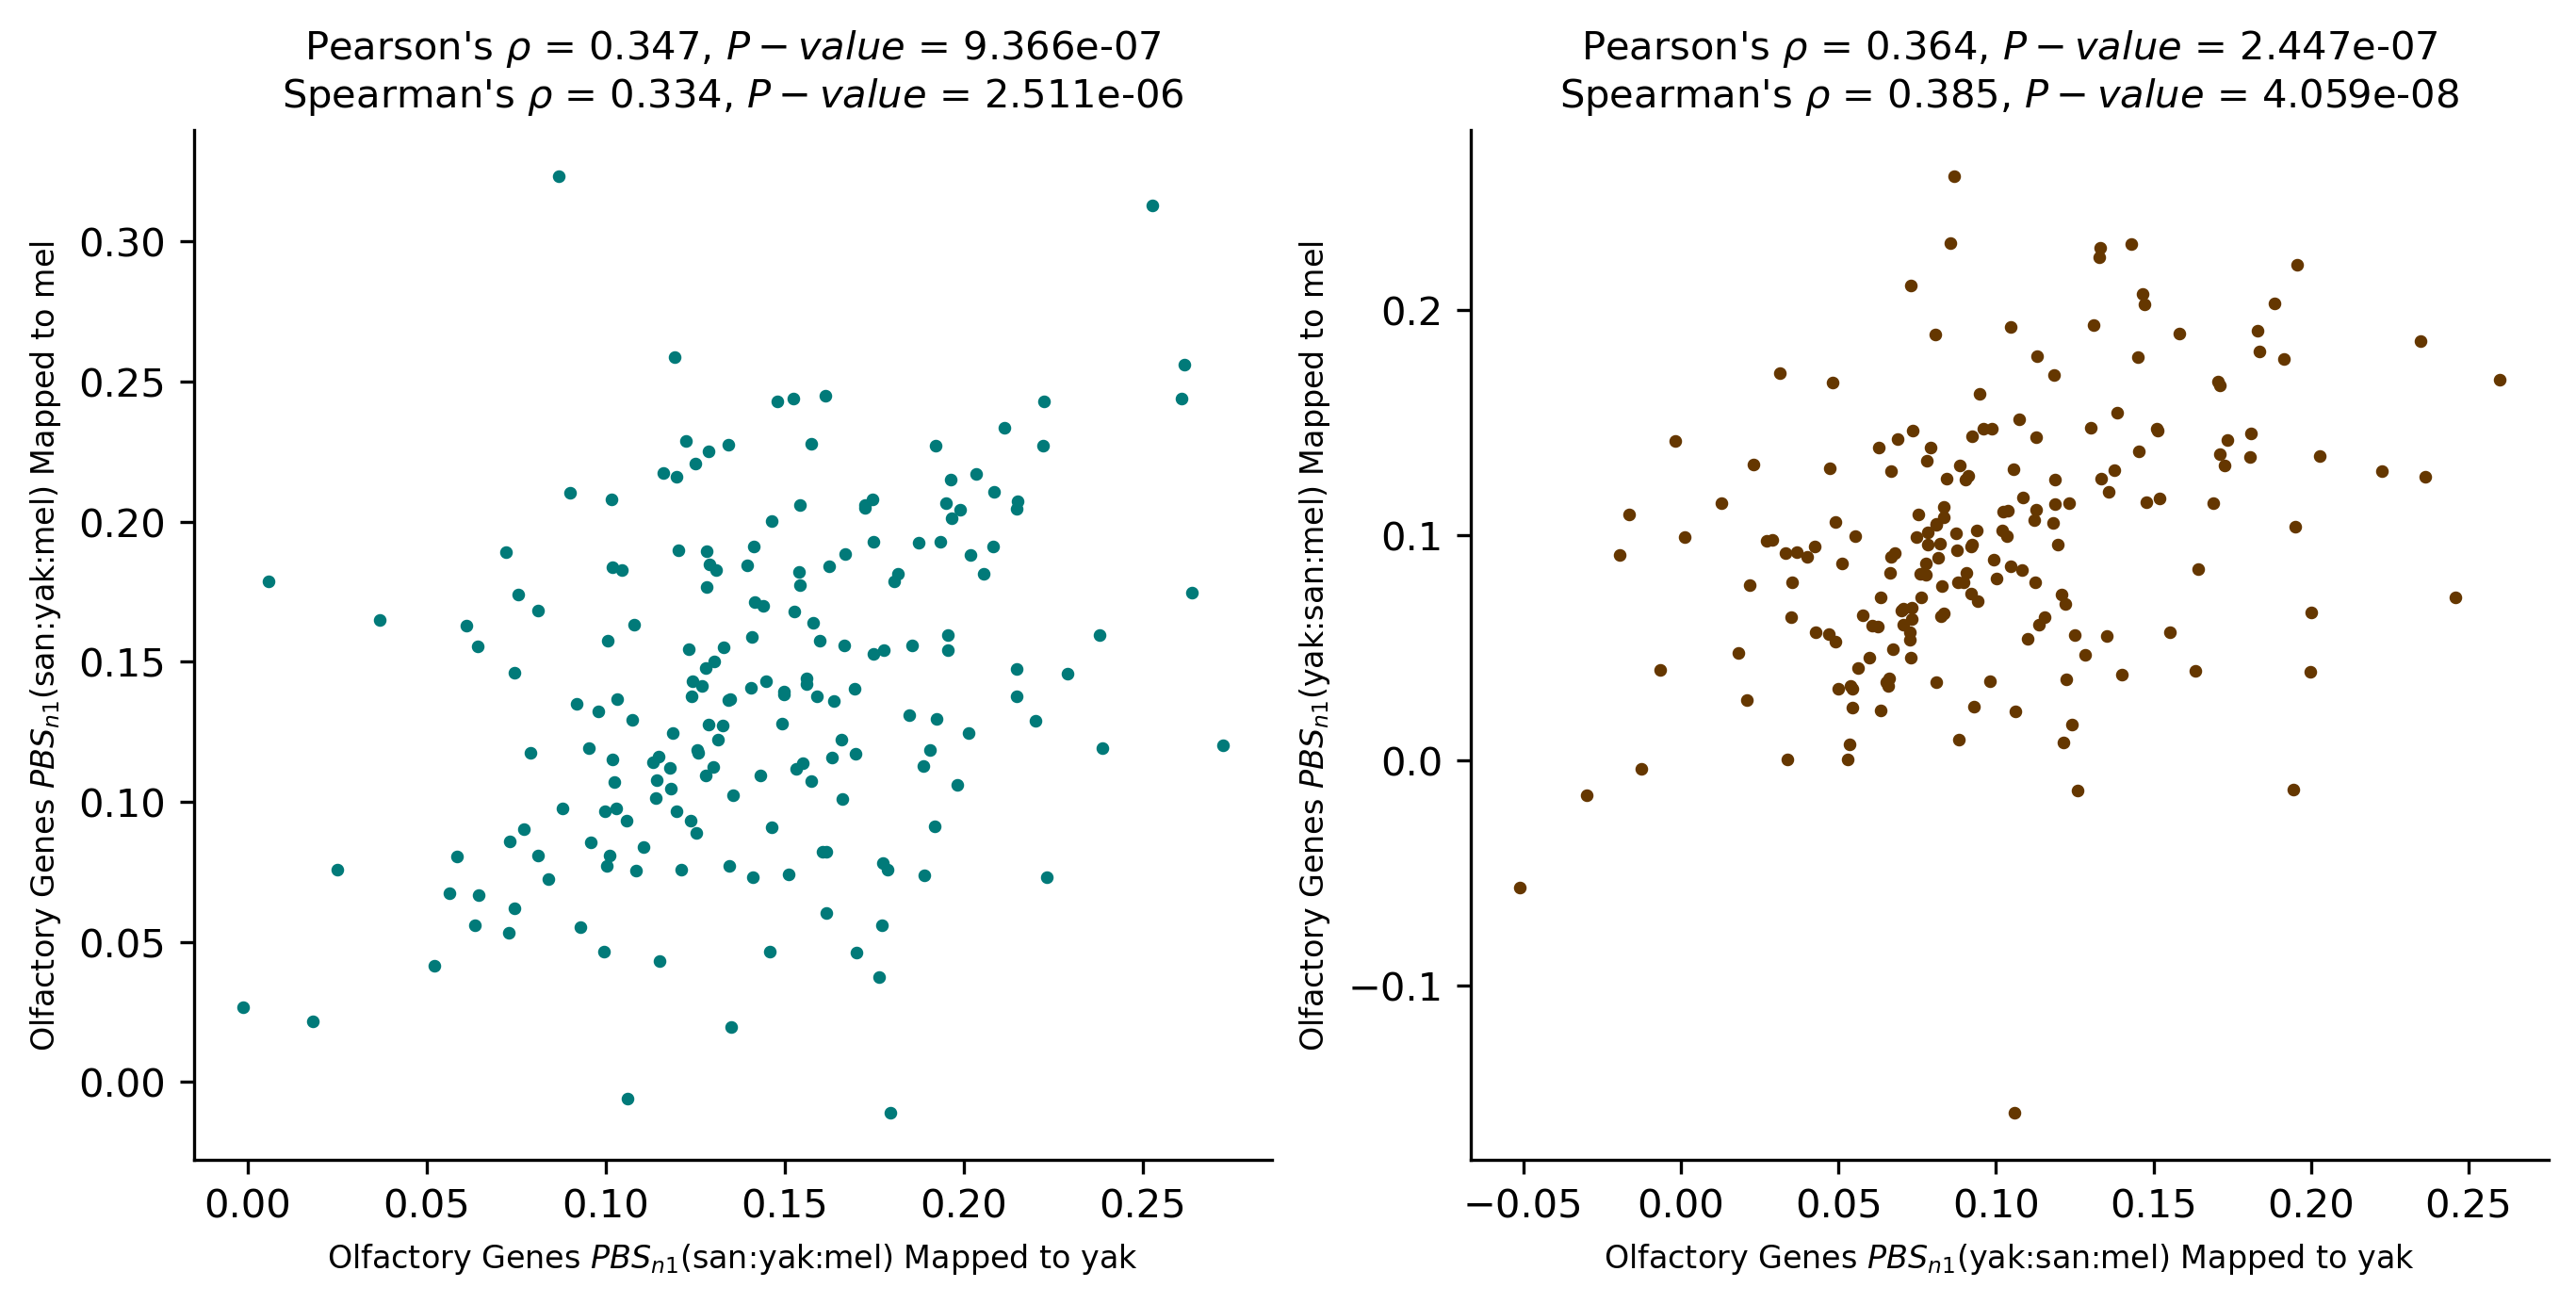

In [4]:
# Intialize the figure and axes.
fig, axes = plt.subplots(
    1,
    2,
    figsize=(9, 4.5),
    dpi=300,
    sharex=False,
    sharey=False,
    facecolor="white",
    constrained_layout=True,
)
# Plot the san:yak:mel correlation.
axes[0].scatter(
    yak_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
    mel_olfac_df["san:yak:mel_pbs"].values[san_yak_mel_mask],
    s=5,
    color="#017a79",
)
axes[0].set_xlabel(r"Olfactory Genes $PBS_{n1}$(san:yak:mel) Mapped to yak", fontsize=8)
axes[0].set_ylabel(r"Olfactory Genes $PBS_{n1}$(san:yak:mel) Mapped to mel", fontsize=8)
axes[0].set_title(san_yak_mel_lab, fontsize=10)
# Plot the yak:san:mel correlation.
axes[1].scatter(
    yak_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
    mel_olfac_df["yak:san:mel_pbs"].values[yak_san_mel_mask],
    s=5,
    color="#653700",
)
axes[1].set_xlabel(r"Olfactory Genes $PBS_{n1}$(yak:san:mel) Mapped to yak", fontsize=8)
axes[1].set_ylabel(r"Olfactory Genes $PBS_{n1}$(yak:san:mel) Mapped to mel", fontsize=8)
axes[1].set_title(yak_san_mel_lab, fontsize=10)
# Show the plot.
plt.show()

## Li et al Fig. 2 Style Plots

In [13]:
# Subset the dataframes by gene type.
mel_gb_df = mel_df[(mel_df.gene_type == "GB") & (mel_df.seg_sites.values > 10)]
mel_olfac_df = mel_df[(mel_df.gene_type != "GB") & (mel_df.seg_sites.values > 10)]
yak_gb_df = yak_df[(yak_df.gene_type == "GB") & (yak_df.seg_sites.values > 39)]
yak_olfac_df = yak_df[(yak_df.gene_type != "GB") & (yak_df.seg_sites.values > 39)]

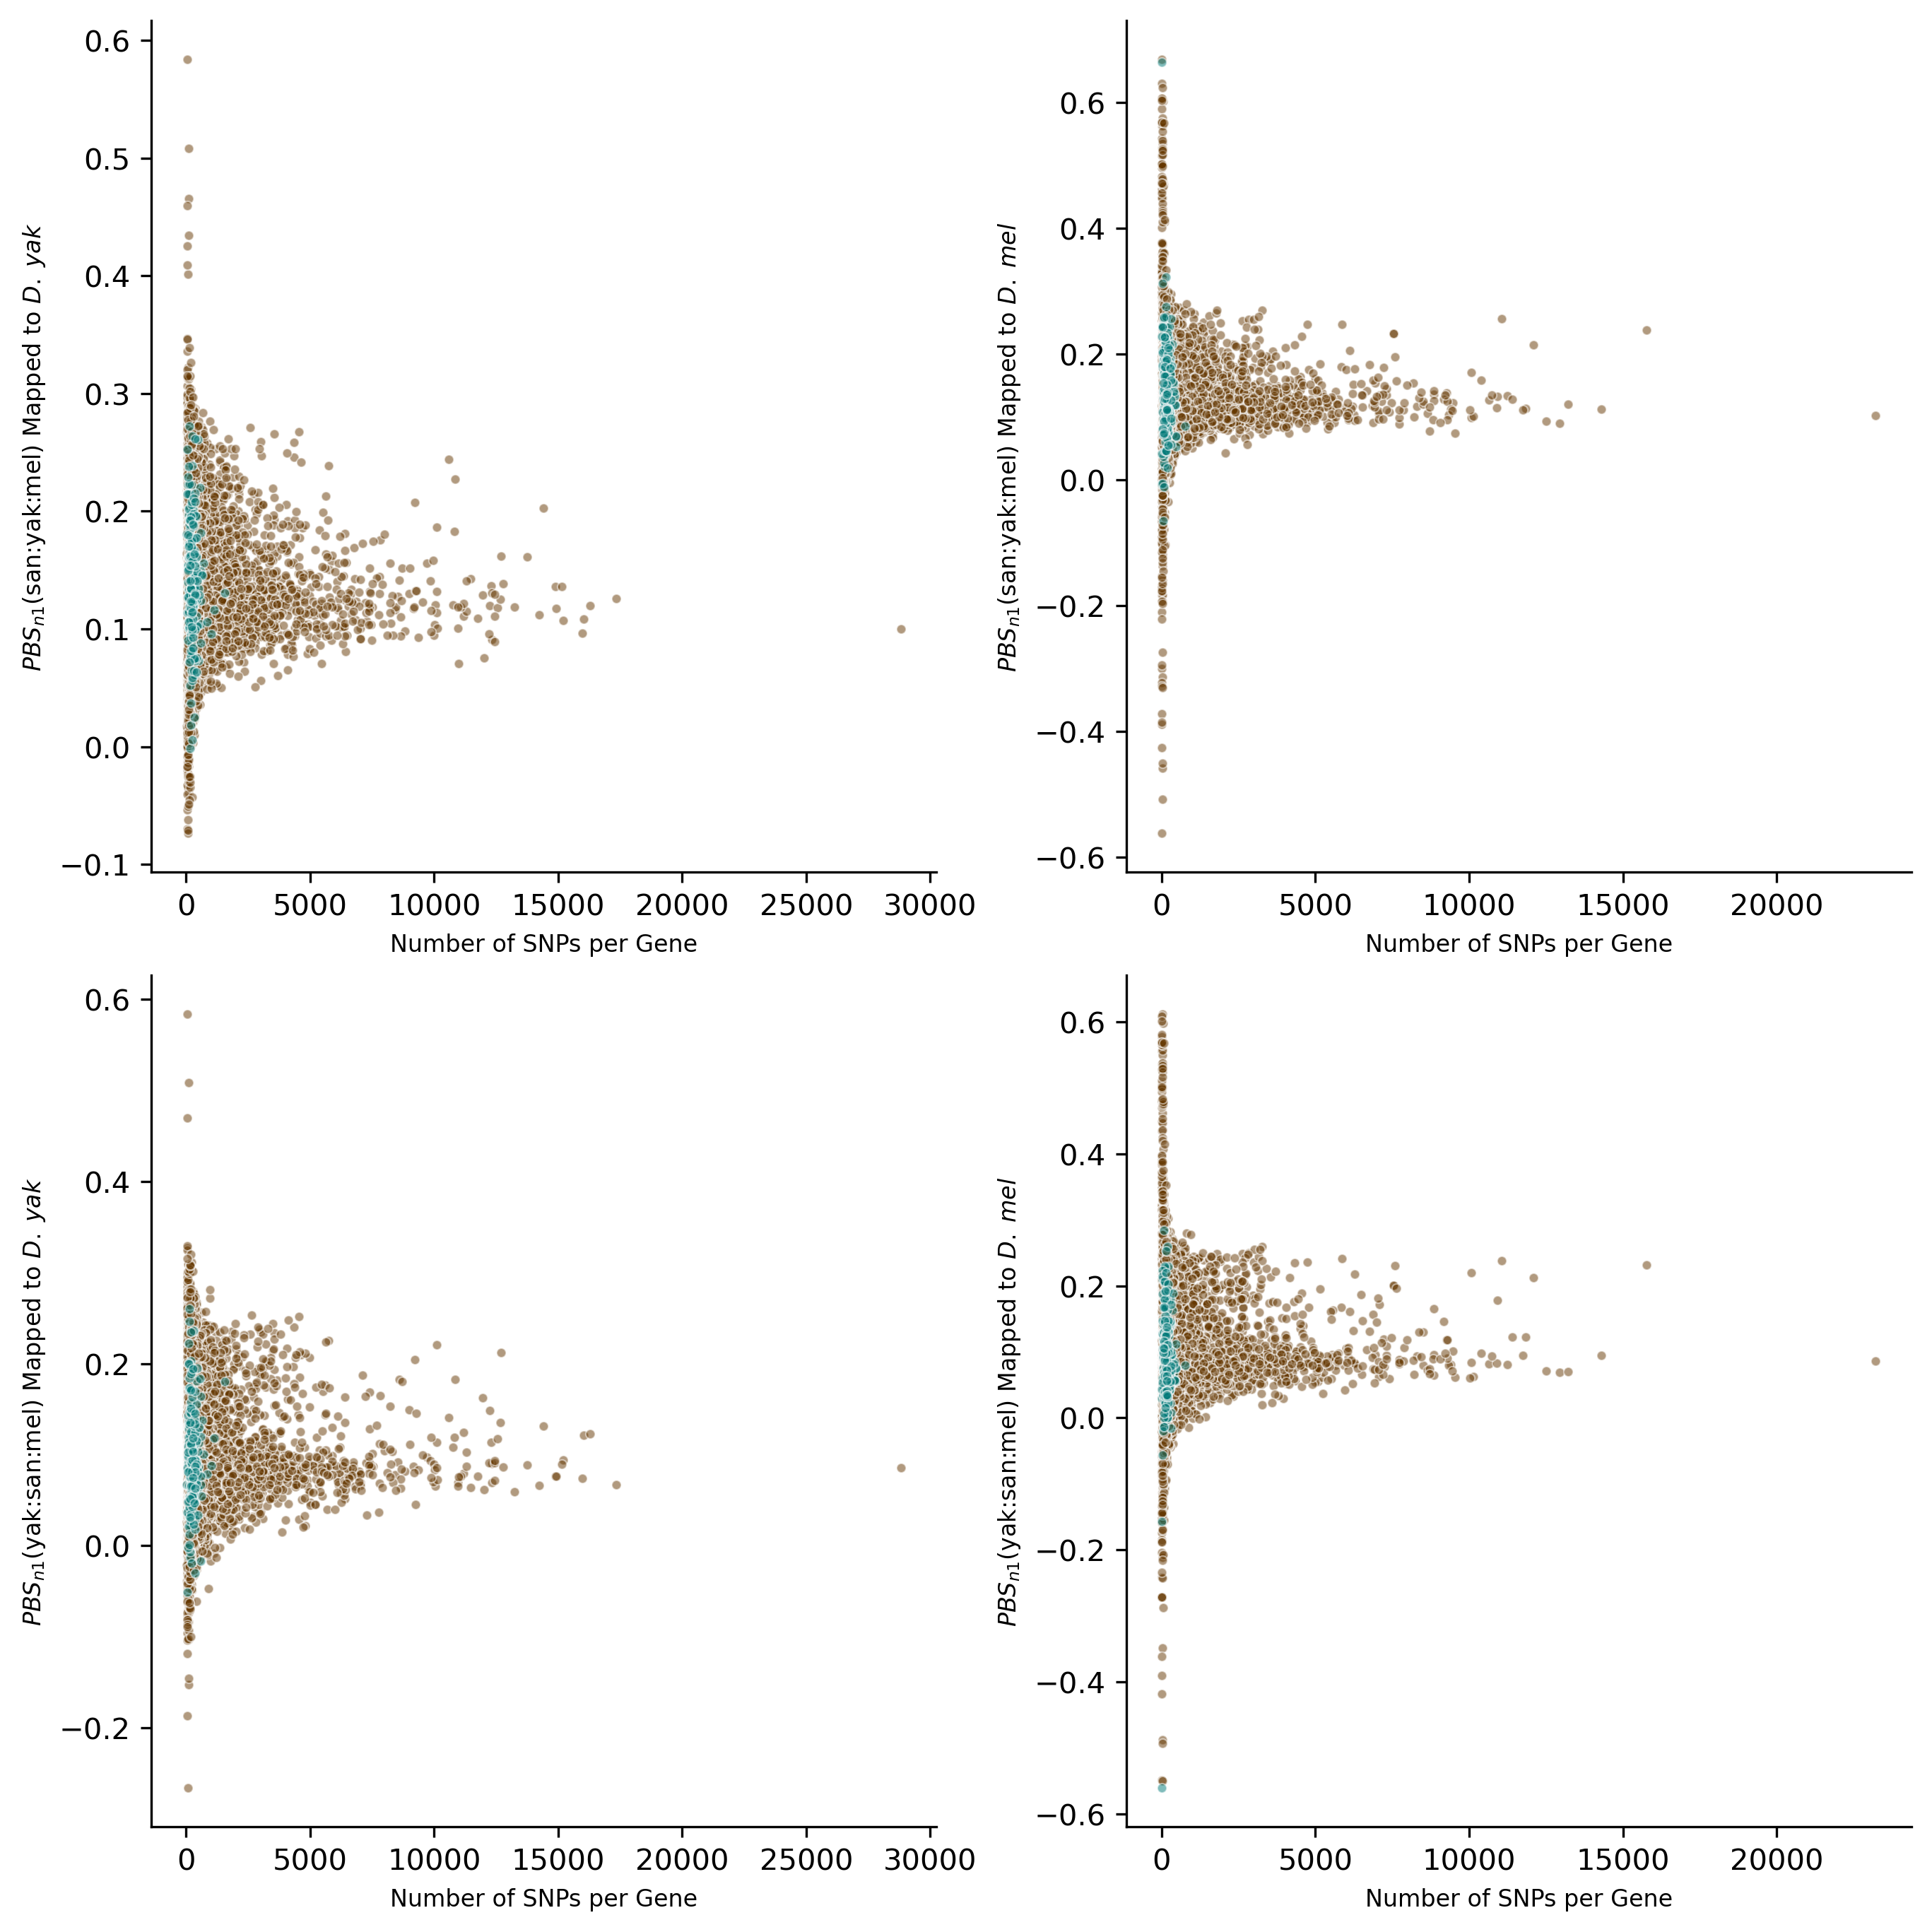

In [15]:
# Intialize the figure and axes.
fig, axes = plt.subplots(
    2,
    2,
    figsize=(9, 9),
    dpi=300,
    sharex=False,
    sharey=False,
    facecolor="white",
    constrained_layout=True,
)
# Plot the mapped to yak results for PBS(san:yak:mel).
axes[0, 0].scatter(
    yak_gb_df["seg_sites"].values,
    yak_gb_df["san:yak:mel_pbs"].values,
    facecolor="#653700",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[0, 0].scatter(
    yak_olfac_df["seg_sites"].values,
    yak_olfac_df["san:yak:mel_pbs"].values,
    facecolor="#017a79",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[0, 0].set_xlabel("Number of SNPs per Gene", fontsize=8)
axes[0, 0].set_ylabel(r"$PBS_{n1}$(san:yak:mel) Mapped to $D. \; yak$", fontsize=8)
# Plot the mapped to mel results for PBS(san:yak:mel).
axes[0, 1].scatter(
    mel_gb_df["seg_sites"].values,
    mel_gb_df["san:yak:mel_pbs"].values,
    facecolor="#653700",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[0, 1].scatter(
    mel_olfac_df["seg_sites"].values,
    mel_olfac_df["san:yak:mel_pbs"].values,
    facecolor="#017a79",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[0, 1].set_xlabel("Number of SNPs per Gene", fontsize=8)
axes[0, 1].set_ylabel(r"$PBS_{n1}$(san:yak:mel) Mapped to $D. \; mel$", fontsize=8)
# Plot the mapped to yak results for PBS(yak:san:mel).
axes[1, 0].scatter(
    yak_gb_df["seg_sites"].values,
    yak_gb_df["yak:san:mel_pbs"].values,
    facecolor="#653700",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[1, 0].scatter(
    yak_olfac_df["seg_sites"].values,
    yak_olfac_df["yak:san:mel_pbs"].values,
    facecolor="#017a79",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[1, 0].set_xlabel("Number of SNPs per Gene", fontsize=8)
axes[1, 0].set_ylabel(r"$PBS_{n1}$(yak:san:mel) Mapped to $D. \; yak$", fontsize=8)
# Plot the mapped to mel results for PBS(yak:san:mel).
axes[1, 1].scatter(
    mel_gb_df["seg_sites"].values,
    mel_gb_df["yak:san:mel_pbs"].values,
    facecolor="#653700",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[1, 1].scatter(
    mel_olfac_df["seg_sites"].values,
    mel_olfac_df["yak:san:mel_pbs"].values,
    facecolor="#017a79",
    marker="o",
    s=10,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.5,
)
axes[1, 1].set_xlabel("Number of SNPs per Gene", fontsize=8)
axes[1, 1].set_ylabel(r"$PBS_{n1}$(yak:san:mel) Mapped to $D. \; mel$", fontsize=8)
# Show the plot.
plt.show()

## PBS Stratified by Chromosome

In [17]:
# Subset the dataframes by gene type.
mel_gb_df = mel_df[(mel_df.gene_type == "GB") & (mel_df.seg_sites.values > 10)]
mel_olfac_df = mel_df[(mel_df.gene_type != "GB") & (mel_df.seg_sites.values > 10)]
yak_gb_df = yak_df[(yak_df.gene_type == "GB") & (yak_df.seg_sites.values > 39)]
yak_olfac_df = yak_df[(yak_df.gene_type != "GB") & (yak_df.seg_sites.values > 39)]
# Extract the genome PBS values.
gb_san_yak_mel = [
    yak_gb_df["san:yak:mel_pbs"].values,
    mel_gb_df["san:yak:mel_pbs"].values,
]
gb_yak_san_mel = [
    yak_gb_df["yak:san:mel_pbs"].values,
    mel_gb_df["yak:san:mel_pbs"].values,
]
# Extract the olfactory PBS values.
olfac_san_yak_mel = [
    yak_olfac_df["san:yak:mel_pbs"].values,
    mel_olfac_df["san:yak:mel_pbs"].values,
]
olfac_yak_san_mel = [
    yak_olfac_df["yak:san:mel_pbs"].values,
    mel_olfac_df["yak:san:mel_pbs"].values,
]
# Set the center positions.
org_pos = np.arange(0, 2 * 3, 3)
label_pos = org_pos + 0.5
gb_pos = org_pos
olfac_pos = org_pos + 1

In [ ]:
# Intialize the figure and axes.
fig, axes = plt.subplots(
    1,
    2,
    figsize=(9, 4.5),
    dpi=300,
    sharex=False,
    sharey=False,
    facecolor="white",
    constrained_layout=True,
)